# MMA 831 - Marketing Analytics
Individual Project - Austin Kean

### Load Data & Review

In [67]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [68]:
# Load data from a CSV file
dataset = pd.read_csv("Telco-Customer-Churn.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [69]:
# Drop the 'customerID' column
dataset = dataset.drop('customerID', axis=1)

# Removel blank Total Charges & Convert type
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'].str.strip(), errors='coerce')
dataset = dataset.dropna(subset=['TotalCharges'])
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')

# Show unique values for each column
unique_values_summary = pd.DataFrame({
    'Unique Values': dataset.nunique()
})

# Print the cleaned dataset and unique values summary
print(unique_values_summary)

                  Unique Values
gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                       72
PhoneService                  2
MultipleLines                 3
InternetService               3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtection              3
TechSupport                   3
StreamingTV                   3
StreamingMovies               3
Contract                      3
PaperlessBilling              2
PaymentMethod                 4
MonthlyCharges             1584
TotalCharges               6530
Churn                         2


In [70]:
# Identify categorical columns, excluding 'TotalCharges'
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != 'TotalCharges']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    dataset[col] = le.fit_transform(dataset[col])

# Display the updated dataset
print(dataset.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

### Data Exploration

In [71]:
# Analyze Dataset post cleaning
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

<Figure size 2000x1000 with 0 Axes>

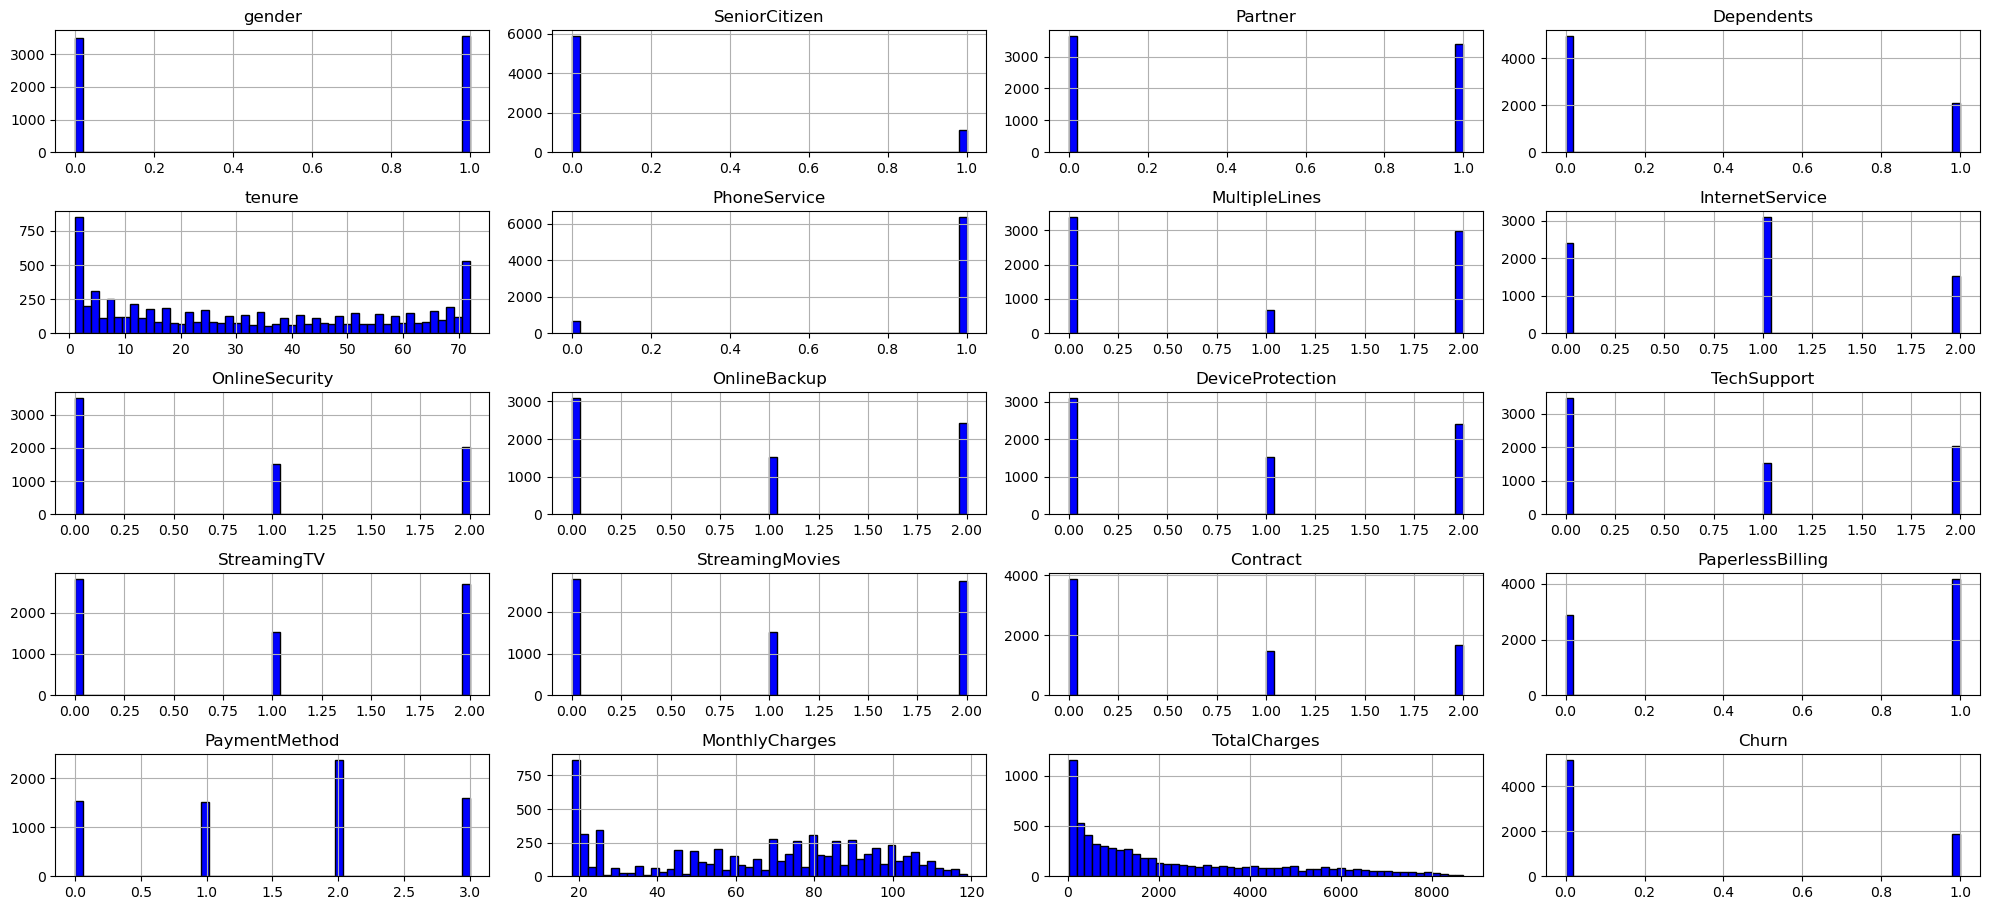

In [72]:
# Visualize Histogram for data overview
plt.figure(figsize=(20, 10))
dataset.hist(
    figsize=(20, 10), 
    bins=50, 
    xlabelsize=10, 
    ylabelsize=10, 
    color='blue',  
    edgecolor='black'  
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

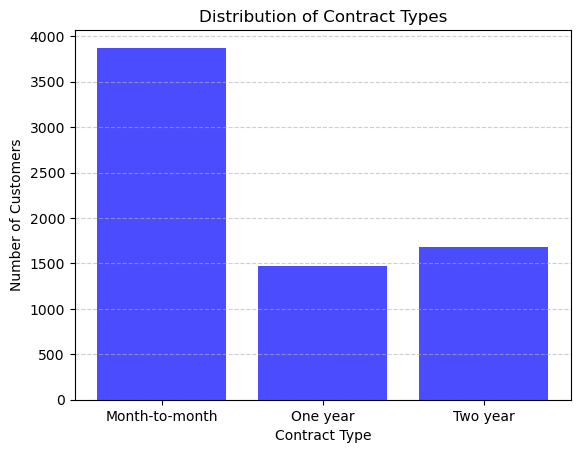

In [73]:
# Segment Analysis by Contract Type
contract_counts = dataset['Contract'].value_counts().sort_index()

# Create a bar chart
plt.bar(contract_counts.index, contract_counts.values, color='blue', alpha=0.7)
plt.xticks(ticks=[0, 1, 2], labels=['Month-to-month', 'One year', 'Two year'])
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Distribution of Contract Types')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

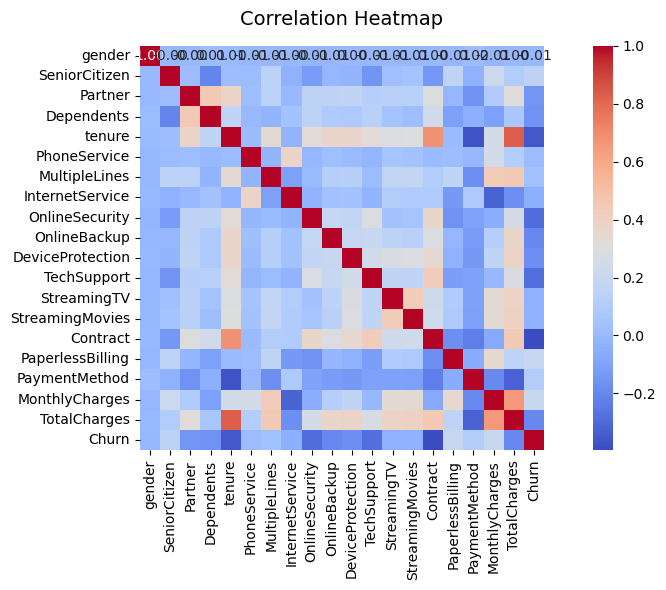

In [84]:
# Correlation correlation matrix
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",          
    cmap='coolwarm',    
    cbar=True,          
    square=True        
)
plt.title('Correlation Heatmap', fontsize=14, pad=15)
plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10, rotation=0)   
plt.tight_layout()
plt.show()